In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df=pd.read_csv('../Data/Stress-Lysis.csv')
df

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [127]:
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [128]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [129]:
df=df.drop_duplicates()

In [130]:
df

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [131]:
df.isnull()

,Humidity,Temperature,Step count,Stress Level
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1996,False,False,False,False
1997,False,False,False,False
1998,False,False,False,False
1999,False,False,False,False


In [132]:
df.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [133]:
c=df.corr()
c

,Humidity,Temperature,Step count,Stress Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step count,0.870486,0.870486,1.000000,0.832623
Stress Level,0.936036,0.936036,0.832623,1.000000


<AxesSubplot:>

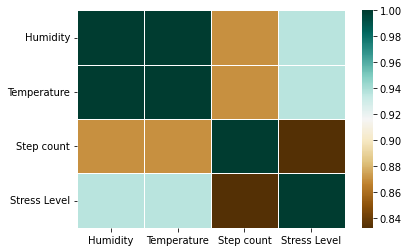

In [134]:
sns.heatmap(c,cmap='BrBG',linewidths=.5)

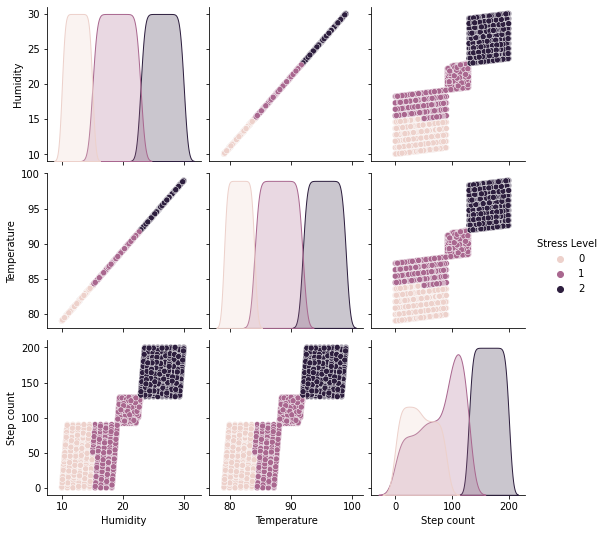

In [135]:
sns.pairplot(df,hue='Stress Level')

In [136]:
df=df.rename(columns={'Stress Level':'Stress'},inplace=False)

In [137]:
df.head()

,Humidity,Temperature,Step count,Stress
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [138]:
target=df.Stress

In [139]:
df=df.drop('Stress',axis=1)

In [140]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(df)
df1=pd.DataFrame(X,columns=['Humidity','Temp','Step'])
df1

,Humidity,Temp,Step
0,0.230248,0.230248,0.392972
1,0.244097,0.244097,-0.122772
2,1.232604,1.232604,1.647949
3,1.322626,1.322626,1.321311
4,-1.580572,-1.580572,-0.225920
...,...,...,...
1996,0.315076,0.315076,-0.071197
1997,-1.653282,-1.653282,-0.947962
1998,1.249916,1.249916,0.599270
1999,-1.305314,-1.305314,-0.621324


In [143]:
df=pd.concat([df1,target],axis=1)
df

,Humidity,Temp,Step,Stress
0,0.230248,0.230248,0.392972,1
1,0.244097,0.244097,-0.122772,1
2,1.232604,1.232604,1.647949,2
3,1.322626,1.322626,1.321311,2
4,-1.580572,-1.580572,-0.225920,0
...,...,...,...,...
1996,0.315076,0.315076,-0.071197,1
1997,-1.653282,-1.653282,-0.947962,0
1998,1.249916,1.249916,0.599270,2
1999,-1.305314,-1.305314,-0.621324,0


In [145]:
df.to_csv('../Input/preprocessed_data.csv')

In [150]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2)
train.reset_index(drop=True)
test.reset_index(drop=True)

,Humidity,Temp,Step,Stress
0,-0.827507,-0.827507,-0.569750,1
1,-0.766915,-0.766915,-1.532472,1
2,-0.995432,-0.995432,-0.672898,0
3,1.114883,1.114883,1.699523,2
4,1.109690,1.109690,1.647949,2
...,...,...,...,...
396,1.246454,1.246454,0.564887,2
397,-1.106227,-1.106227,-0.208729,0
398,1.227410,1.227410,1.596375,2
399,1.019668,1.019668,0.753993,2


In [ ]:
train.to_csv('../Input/train.csv')
test.to_csv('../Input/test.csv')